In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import datetime as dt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_csv('data/raw/insurance.csv')

In [13]:
print('Number of  Examples = {}'.format(df.shape[0]))
print('X Shape = {}'.format(df.shape[1]))
print('Y Shape = {}\n'.format(df.shape[0]))
print(df.columns)

Number of  Examples = 1244
X Shape = 7
Y Shape = 1244

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1244 non-null   int64  
 1   sex       1244 non-null   object 
 2   bmi       1244 non-null   float64
 3   children  1244 non-null   int64  
 4   smoker    1244 non-null   object 
 5   region    1244 non-null   object 
 6   charges   1244 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 68.2+ KB
None


In [15]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
111,18,male,23.75,0,no,northeast,1705.6245
412,39,male,29.60,4,no,southwest,7512.2670
402,31,female,32.68,1,no,northwest,4738.2682


In [16]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [17]:
for col in df.columns.tolist():
    print('({}) column missing values: {}'.format(col, df[col].isnull().sum()))
print('\n')

(age) column missing values: 0
(sex) column missing values: 0
(bmi) column missing values: 0
(children) column missing values: 0
(smoker) column missing values: 0
(region) column missing values: 0
(charges) column missing values: 0




In [18]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

In [ ]:
# 计算相关性矩阵
correlation_matrix = df.corr()

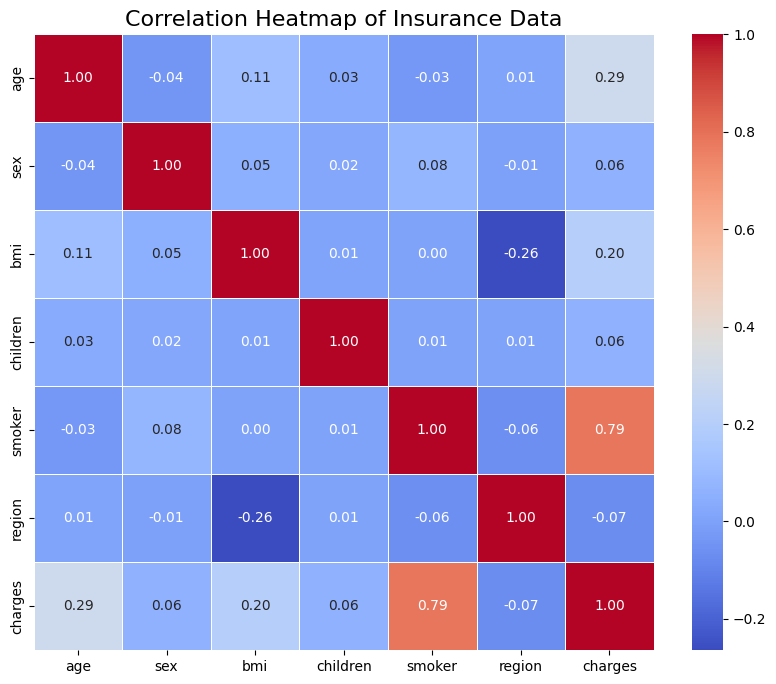

In [ ]:
# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Insurance Data', fontsize=16)
plt.show()

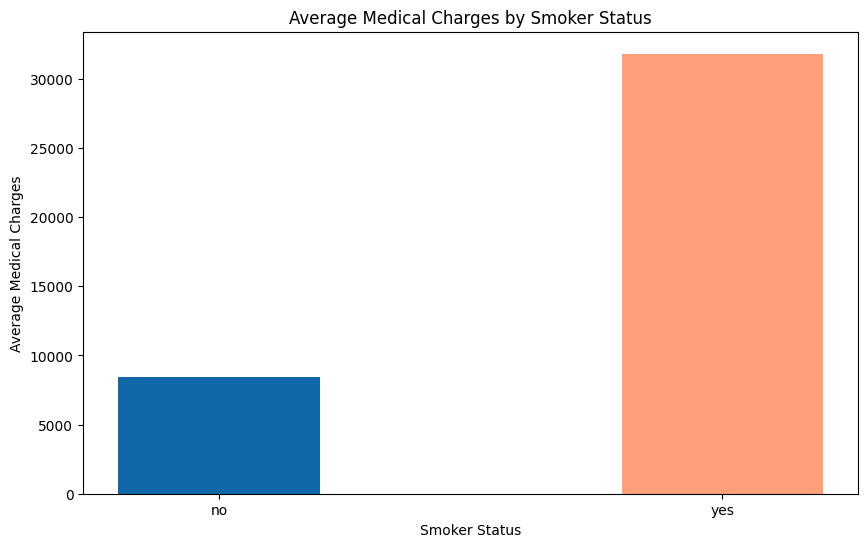

In [ ]:
# 1. 吸烟状态对医疗费用的影响
smoker_status = ['no', 'yes']
smoker_charges = [df['charges'][df['smoker'] == 0].mean(), df['charges'][df['smoker'] == 1].mean()]

plt.figure(figsize=(10, 6))
plt.bar(smoker_status, smoker_charges, color=['#1168A8', '#FFA07A'], width=0.4)
plt.xlabel('Smoker Status')
plt.ylabel('Average Medical Charges')
plt.title('Average Medical Charges by Smoker Status')
plt.show()

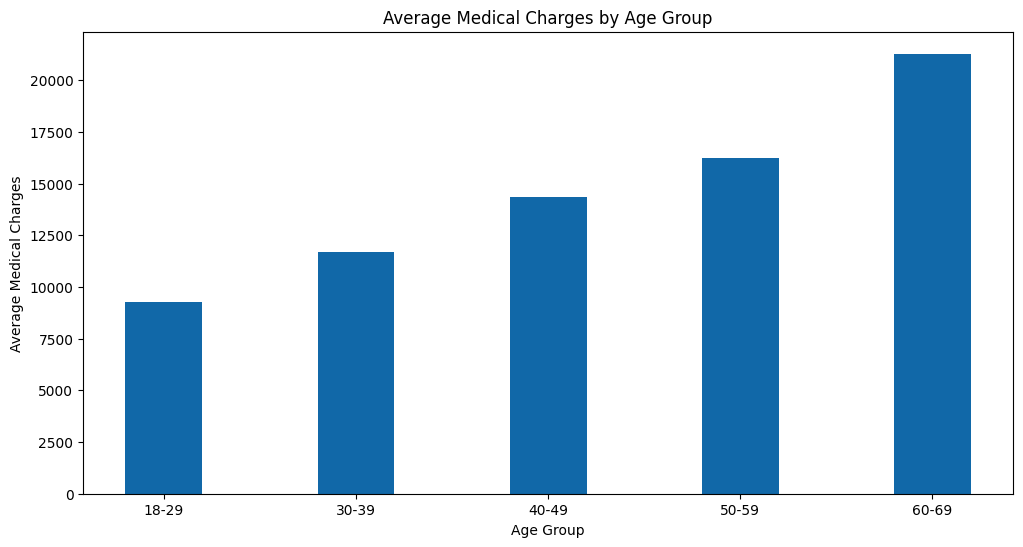

In [ ]:
# 2. 年龄对医疗费用的影响
# 将年龄分为几个年龄段
age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# 确保没有缺失值
df.dropna(subset=['age_group'], inplace=True)

# 获取年龄段并排序
age_groups = sorted(df['age_group'].unique(), key=lambda x: int(x.split('-')[0]))

# 计算每个年龄段的平均医疗费用
age_charges = [df['charges'][df['age_group'] == group].mean() for group in age_groups]

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(age_groups, age_charges, color='#1168A8', width=0.4)
plt.xlabel('Age Group')
plt.ylabel('Average Medical Charges')
plt.title('Average Medical Charges by Age Group')
plt.show()

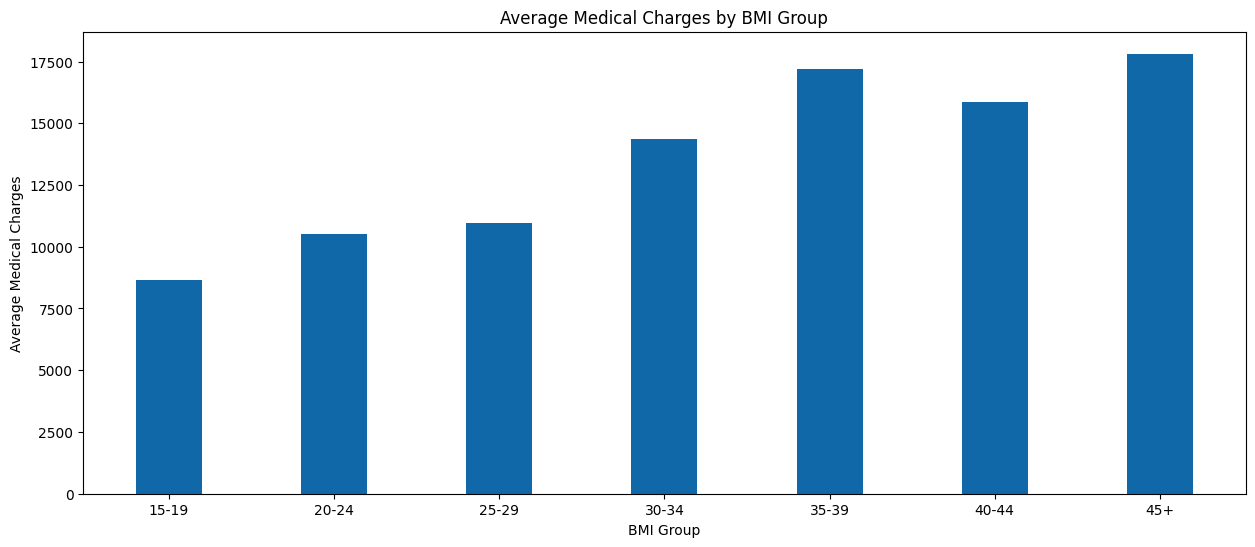

In [ ]:
# 3. BMI对医疗费用的影响
# 将BMI分为几个区间
bmi_bins = [15, 20, 25, 30, 35, 40, 45, 50]
bmi_labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45+']
df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# 确保没有缺失值
df.dropna(subset=['bmi_group'], inplace=True)

# 获取BMI分组并排序
bmi_groups = sorted(df['bmi_group'].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else int(x[:-1]))

# 计算每个BMI分组的平均医疗费用
bmi_charges = [df['charges'][df['bmi_group'] == group].mean() for group in bmi_groups]

# 绘制柱状图
plt.figure(figsize=(15, 6))
plt.bar(bmi_groups, bmi_charges, color='#1168A8', width=0.4)
plt.xlabel('BMI Group')
plt.ylabel('Average Medical Charges')
plt.title('Average Medical Charges by BMI Group')
plt.show()

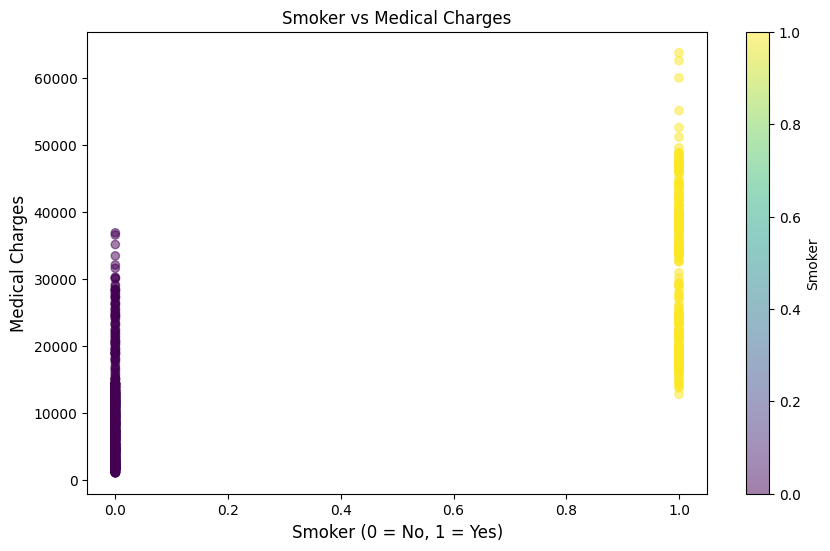

In [ ]:
# 1. 吸烟状态（smoker）与医疗费用（charges）的散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['smoker'], df['charges'], alpha=0.5, c=df['smoker'], cmap='viridis')
plt.xlabel('Smoker (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Medical Charges', fontsize=12)
plt.title('Smoker vs Medical Charges')
plt.colorbar(label='Smoker')
plt.show()

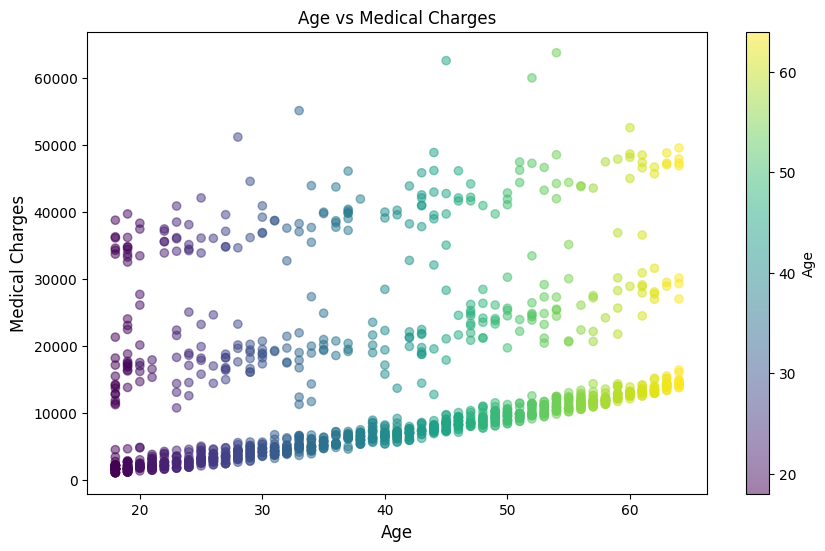

In [ ]:
# 2. 年龄（age）与医疗费用（charges）的散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], alpha=0.5, c=df['age'], cmap='viridis')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Medical Charges', fontsize=12)
plt.title('Age vs Medical Charges')
plt.colorbar(label='Age')
plt.show()

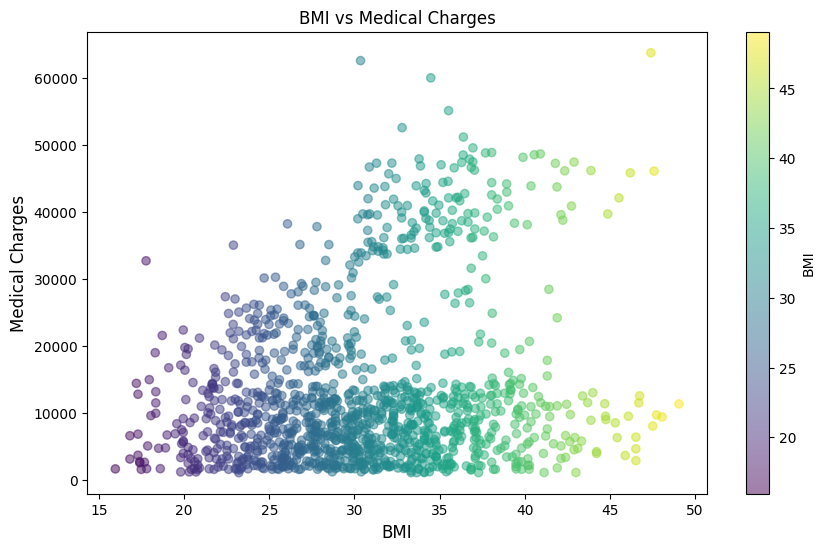

In [ ]:
# 3. BMI（bmi）与医疗费用（charges）的散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.5, c=df['bmi'], cmap='viridis')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Medical Charges', fontsize=12)
plt.title('BMI vs Medical Charges')
plt.colorbar(label='BMI')
plt.show()

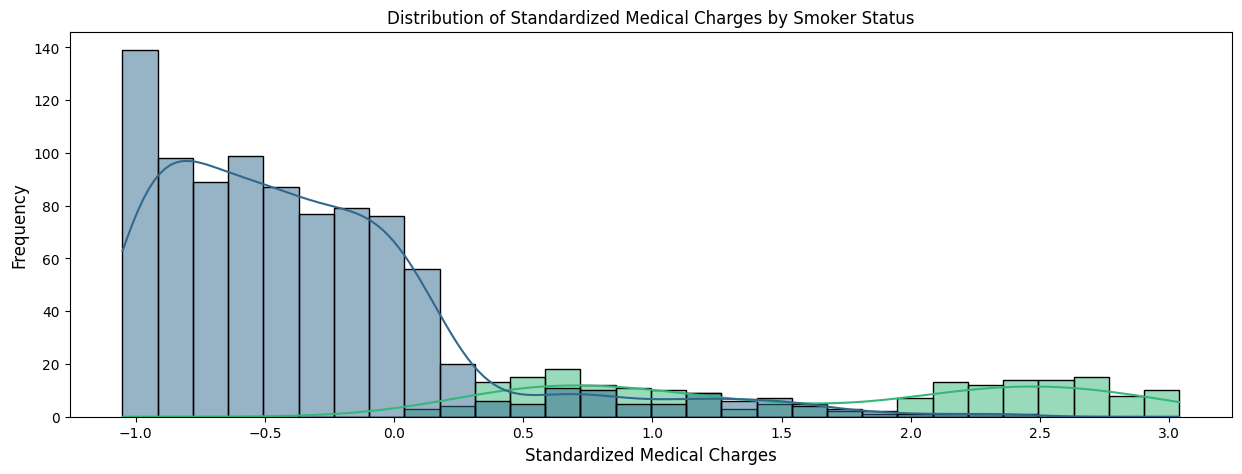

In [ ]:
# 数据预处理
# 1. 去除数据较少的部分
# 对于连续变量，去除极端值（如1%和99%分位数之外的值）
quantiles = df[['age', 'bmi', 'charges']].quantile([0.01, 0.99]).T
df = df[(df['age'] >= quantiles.loc['age', 0.01]) & (df['age'] <= quantiles.loc['age', 0.99])]
df = df[(df['bmi'] >= quantiles.loc['bmi', 0.01]) & (df['bmi'] <= quantiles.loc['bmi', 0.99])]
df = df[(df['charges'] >= quantiles.loc['charges', 0.01]) & (df['charges'] <= quantiles.loc['charges', 0.99])]

# 2. 数据去中心化和标准化
scaler = StandardScaler()
df[['age', 'bmi', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'charges']])

# 绘制直方图和KDE
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="charges", hue="smoker", palette="viridis", kde=True, bins=30, legend=False)
plt.xlabel('Standardized Medical Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Standardized Medical Charges by Smoker Status')
plt.show()

Mean Squared Error (MSE): 55712466.68
R-squared (R2): 0.57


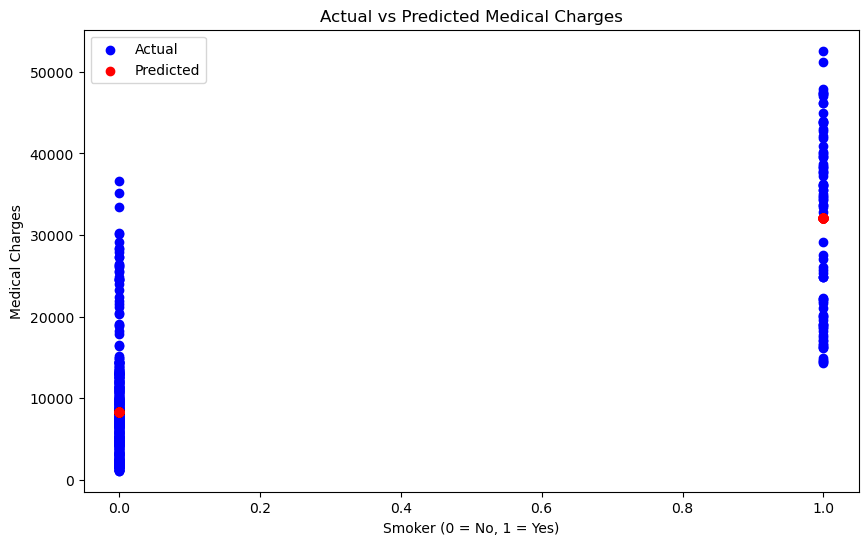

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv('D:/YANER/MII/LB1/data/raw/insurance.csv')

# 将分类变量转换为数值变量
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# 定义因变量和自变量
X = df[['smoker']]  # 自变量：是否吸烟
y = df['charges']   # 因变量：医疗费用

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 构建线性回归模型并拟合
model = LinearRegression()
model.fit(X_train, y_train)

# 预测测试集的医疗费用
y_pred = model.predict(X_test)

# 计算模型的性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# 绘制实际值与预测值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Medical Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.legend()
plt.show()

基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1244 non-null   int64  
 1   sex       1244 non-null   object 
 2   bmi       1244 non-null   float64
 3   children  1244 non-null   int64  
 4   smoker    1244 non-null   object 
 5   region    1244 non-null   object 
 6   charges   1244 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 68.2+ KB
None

描述性统计：
               age          bmi     children       charges
count  1244.000000  1244.000000  1244.000000   1244.000000
mean     39.088424    30.582858     1.103698  13198.216342
std      14.055295     6.159513     1.215885  12001.805804
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.060000     0.000000   4733.635288
50%      39.000000    30.210000     1.000000   9382.033000
75%      51.000000    34.618750     2.000000  16

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


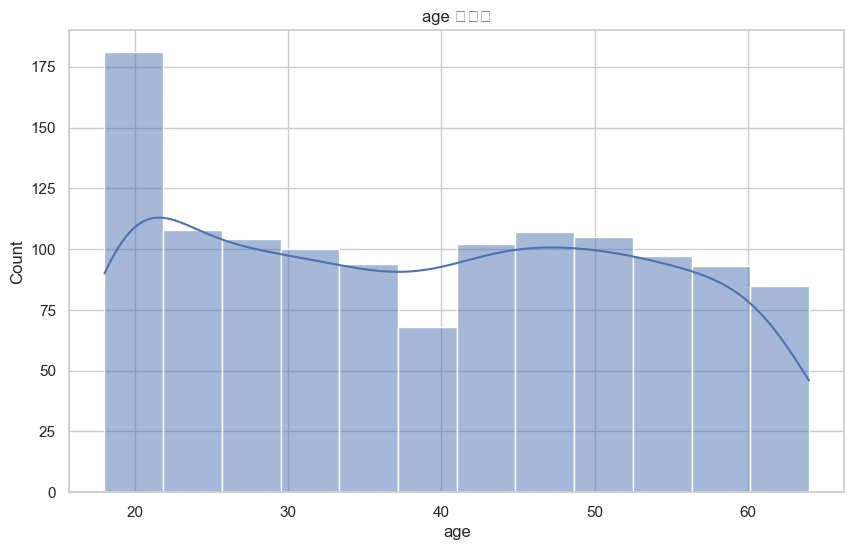

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


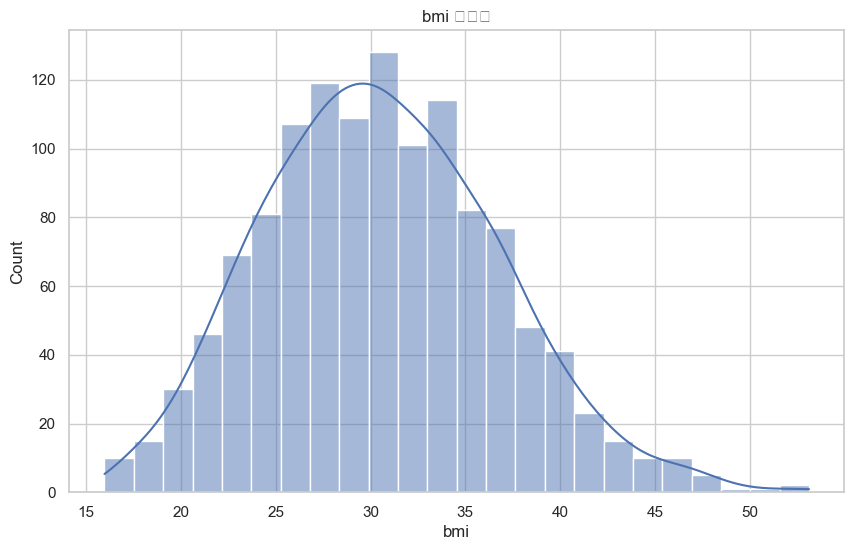

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


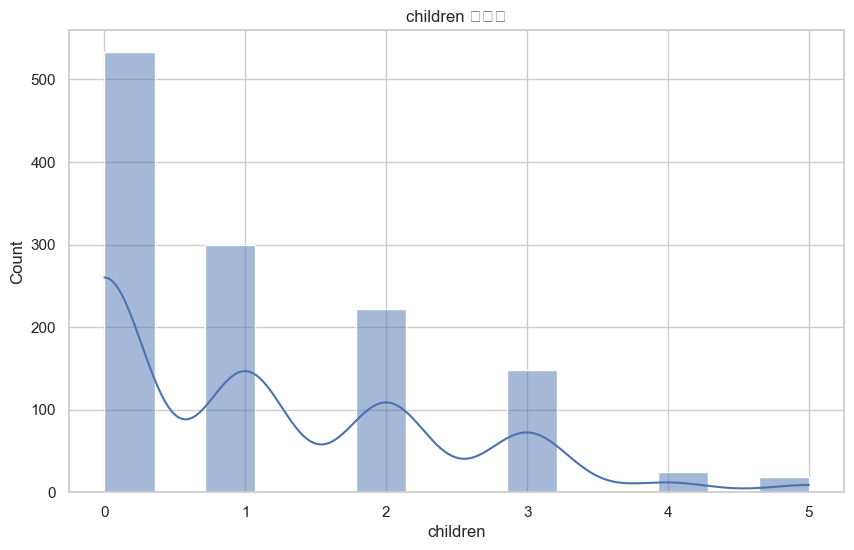

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


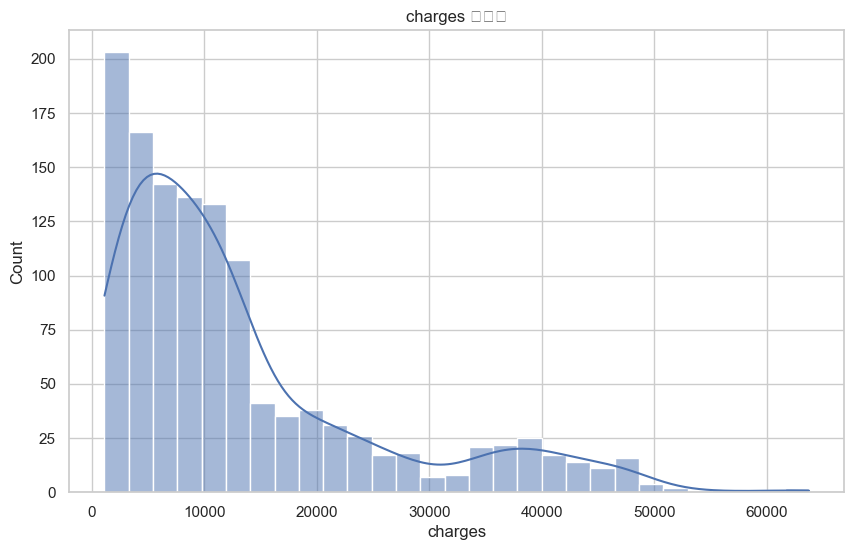

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


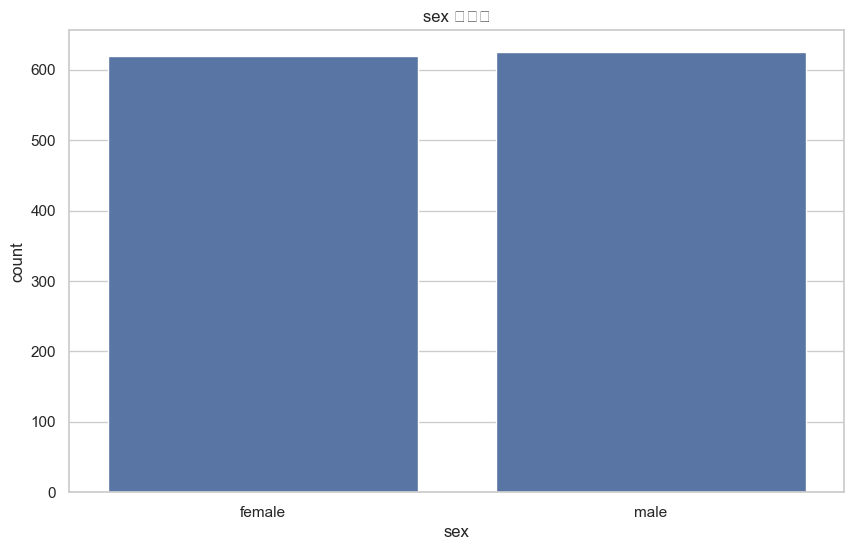

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


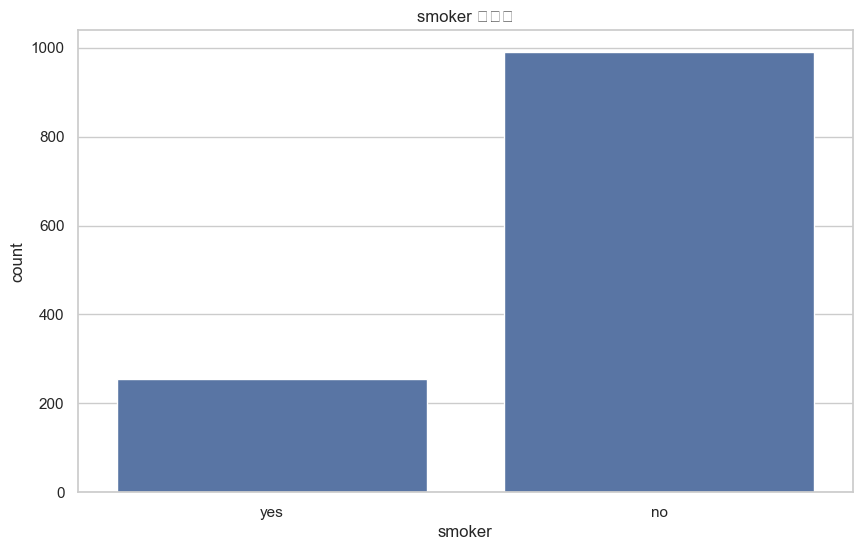

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


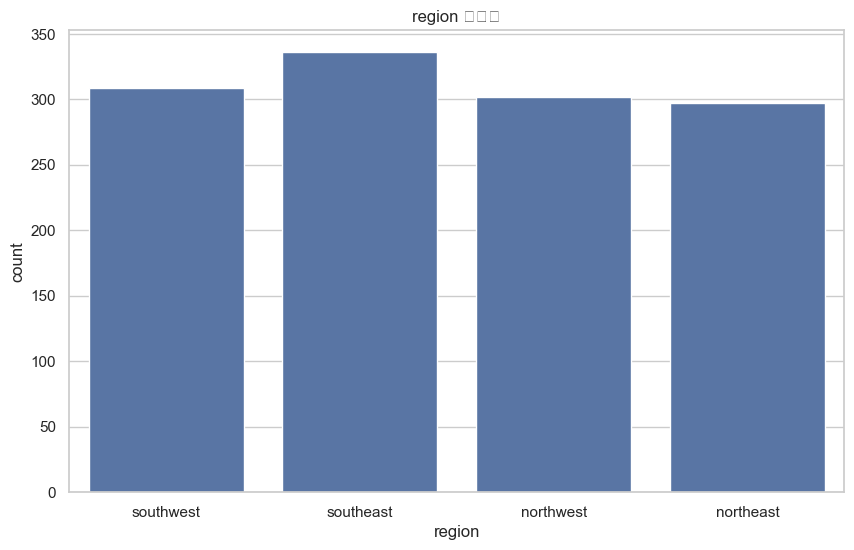

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


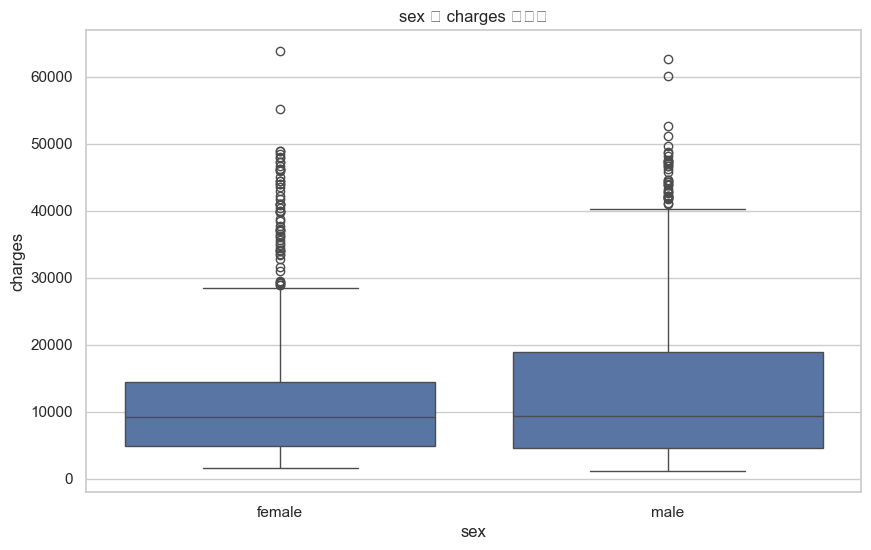

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


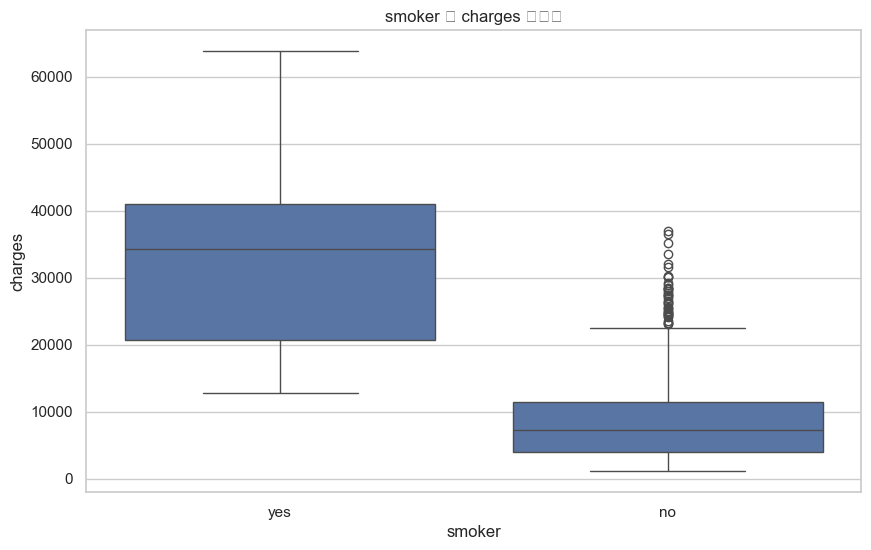

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


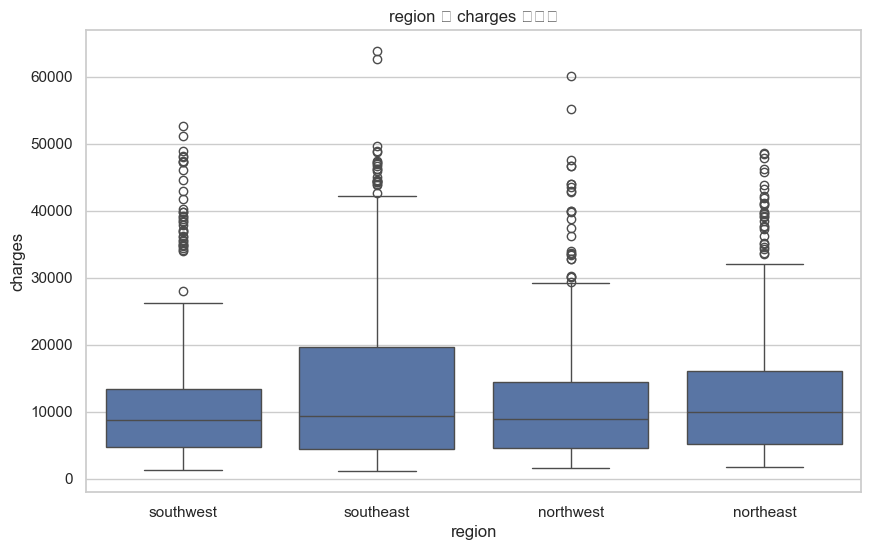

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.p

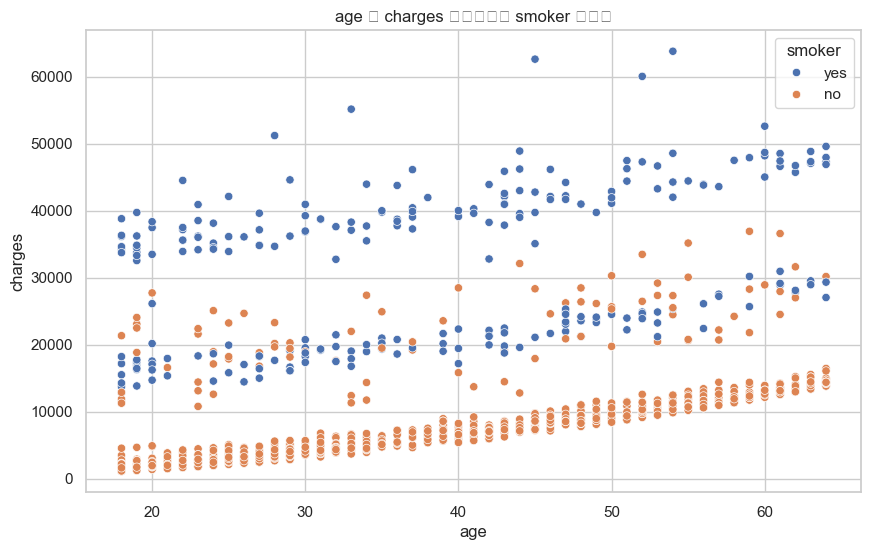

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.p

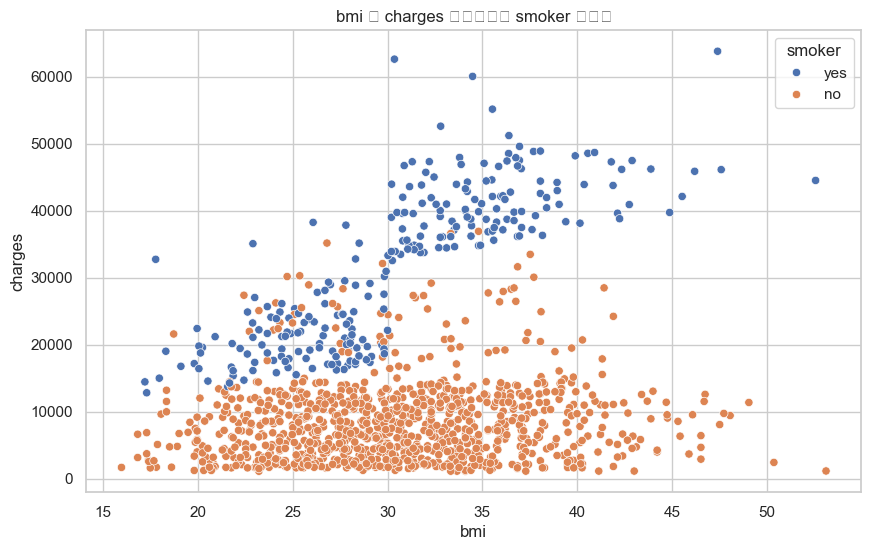

d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.p

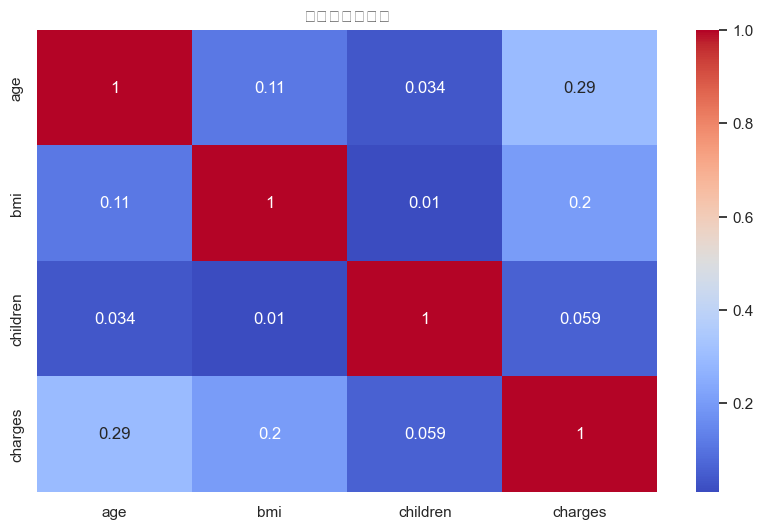


编码后的特征： ['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

特征与 charges 的相关性：
 charges             1.000000
smoker_yes          0.786475
age                 0.294093
bmi                 0.200269
region_southeast    0.082703
sex_male            0.059815
children            0.059241
region_southwest   -0.038622
region_northwest   -0.046827
Name: charges, dtype: float64

--- 初步结论 ---
1. 'smoker' 是最强影响因素，吸烟者医疗费用远高于非吸烟者。
2. 'age' 和 'bmi' 也与费用呈正相关，尤其在高 BMI 的吸烟者中。
3. 'region', 'sex' 对医疗费用影响相对较小。
建议选择的特征： age, bmi, children, smoker, sex, region（编码后）。


In [9]:
# insurance_eda.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图像样式
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. 读取数据
df = pd.read_csv("D:/YANER/MII/LB1/data/raw/insurance.csv")

# 2. 数据基本信息
print("基本信息：")
print(df.info())
print("\n描述性统计：")
print(df.describe())
print("\n类别变量分布：")
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col}:\n", df[col].value_counts())

# 3. 缺失值检查
print("\n缺失值检查：")
print(df.isnull().sum())

# 4. 数值特征的分布
num_features = ['age', 'bmi', 'children', 'charges']
for col in num_features:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} 分布图')
    plt.show()

# 5. 类别特征分布
cat_features = ['sex', 'smoker', 'region']
for col in cat_features:
    sns.countplot(data=df, x=col)
    plt.title(f'{col} 分布图')
    plt.show()

# 6. 类别变量对目标变量的影响（箱线图）
for col in cat_features:
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'{col} 与 charges 的关系')
    plt.show()

# 7. 数值变量与目标变量的关系（散点图）
for col in ['age', 'bmi']:
    sns.scatterplot(x=col, y='charges', hue='smoker', data=df)
    plt.title(f'{col} 与 charges 的关系（按 smoker 分组）')
    plt.show()

# 8. 相关性矩阵
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("相关系数热力图")
plt.show()

# 9. 类别特征编码准备（用于后续建模）
df_encoded = pd.get_dummies(df, drop_first=True)
print("\n编码后的特征：", df_encoded.columns.tolist())

# 10. 特征与目标变量的线性相关性（编码后）
correlation = df_encoded.corr()['charges'].sort_values(ascending=False)
print("\n特征与 charges 的相关性：\n", correlation)

# 11. 小结和特征选择建议
print("\n--- 初步结论 ---")
print("1. 'smoker' 是最强影响因素，吸烟者医疗费用远高于非吸烟者。")
print("2. 'age' 和 'bmi' 也与费用呈正相关，尤其在高 BMI 的吸烟者中。")
print("3. 'region', 'sex' 对医疗费用影响相对较小。")
print("建议选择的特征： age, bmi, children, smoker, sex, region（编码后）。")
